# Calculating the Accuracy of the Model

Using the same dataset, expand the model by including all other features into the regression. 

Moreover, calculate the accuracy of the model and create a confusion matrix

## Import the relevant libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
raw_data = raw_data.drop(['Unnamed: 0'], axis = 1)
raw_data['y'] = raw_data['y'].map({'no': 0, 'yes': 1})
raw_data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [5]:
raw_data.describe()
data = raw_data

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [10]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [11]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


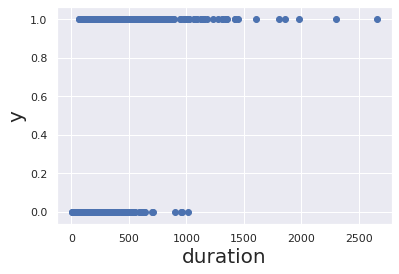

In [17]:
plt.scatter(x1, y)
plt.xlabel('duration', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [19]:
x1 = data[['interest_rate', 'duration', 'march', 'credit', 'previous']]
x1

,interest_rate,duration,march,credit,previous
0,1.334,117.0,1.0,0.0,0.0
1,0.767,274.0,0.0,0.0,1.0
2,4.858,167.0,1.0,0.0,0.0
3,4.120,686.0,0.0,0.0,0.0
4,4.856,157.0,1.0,0.0,0.0
...,...,...,...,...,...
513,1.334,204.0,1.0,0.0,0.0
514,0.861,806.0,0.0,0.0,1.0
515,0.879,290.0,0.0,0.0,0.0
516,0.877,473.0,0.0,0.0,1.0


In [20]:
y = data['y']

### Confusion Matrix

Create the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [ ]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [22]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result_log = reg_log.fit()
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
result_log.predict()


Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


array([0.11, 0.94, 0.01, 0.81, 0.01, 0.53, 0.03, 0.00, 0.71, 0.07, 0.95,
       0.50, 0.89, 0.10, 0.08, 0.82, 0.87, 0.85, 0.37, 0.76, 0.97, 0.87,
       0.13, 0.10, 0.65, 0.09, 0.77, 0.76, 0.90, 0.04, 0.02, 0.12, 0.27,
       0.71, 0.06, 0.01, 0.99, 0.06, 1.00, 0.54, 0.06, 0.84, 0.06, 0.01,
       0.87, 0.55, 0.00, 0.15, 0.16, 0.83, 0.72, 0.05, 0.03, 0.05, 0.01,
       0.81, 0.09, 0.80, 0.98, 0.84, 0.04, 0.11, 0.99, 0.76, 0.16, 0.31,
       0.05, 0.06, 1.00, 0.07, 0.02, 0.72, 0.14, 0.97, 0.87, 0.13, 0.67,
       0.05, 0.01, 0.03, 0.92, 0.79, 0.89, 0.13, 0.19, 0.98, 0.64, 0.86,
       0.74, 0.03, 0.08, 0.03, 0.71, 0.64, 0.95, 0.97, 0.97, 0.03, 0.98,
       0.06, 0.99, 0.07, 0.99, 0.69, 0.28, 0.36, 0.20, 0.70, 0.73, 0.03,
       0.99, 0.41, 0.16, 0.05, 0.94, 0.02, 0.04, 0.90, 0.50, 0.14, 0.10,
       0.00, 0.92, 1.00, 0.33, 0.98, 0.93, 0.84, 0.70, 0.67, 0.05, 0.26,
       0.81, 0.79, 0.81, 0.08, 0.22, 0.74, 0.11, 0.01, 0.01, 0.01, 0.23,
       0.79, 0.23, 1.00, 0.23, 0.01, 1.00, 0.54, 0.

In [23]:
df = pd.DataFrame(result_log.pred_table())
df.columns = ['Predicted 0', 'Predicted1']
df = df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
df

,Predicted 0,Predicted1
Actual 0,218.0,41.0
Actual 1,30.0,229.0


In [28]:
accuracy = (218+229)/(218+229+41+30)*100
accuracy

86.2934362934363